In [2]:
import numpy as np
import matplotlib.pyplot as plt
theta=np.linspace(0,-np.pi*2)
theta2=np.linspace(0,-np.pi*2)
points=np.array([np.sin(theta),np.cos(theta),0*theta])
speeds=np.array([-np.cos(theta2),np.sin(theta2),0*theta2])
def rot_to_top(h):
    x,y,z=h/np.sqrt(np.dot(h,h))
    s,r=np.sqrt(x**2+y**2),np.sqrt(x**2+y**2+z**2)
    # return np.matmul(np.array([[y/s,x/s,0],[-x/s,y/s,0],[0,0,1]]),np.array([[1,0,0],[0,-z/r,-s/r],[0,s/r,z/r]]))
    if x==y==0: return np.array([[1,0,0],[0,1,0],[0,0,1]])
    # Ib=np.array([[y/s,x/s,0],[-x/s,y/s,0],[0,0,1]])
    Ib=np.eye(3)
    return np.matmul(Ib,np.matmul(np.array([[z/r,0,-s/r],[0,1,0],[s/r,0,z/r]]),np.array([[x/s,y/s,0],[-y/s,x/s,0],[0,0,1]])))

#fixed the mirroring of angular momentum by mirroring matrix one in the 2nd collum (*-1), not sure why that was mirrorred in the first place

### testing

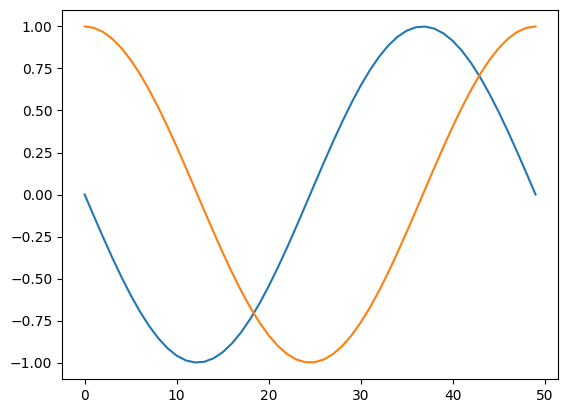

In [57]:
plt.plot(points[0])
plt.plot(points[1])

In [58]:
def rotz(a):
    return np.array([[np.cos(a),-np.sin(a),0],[np.sin(a),np.cos(a),0],[0,0,1]])
def roty(b):
    return np.array([[np.cos(b),0,np.sin(b)],[0,1,0],[-np.sin(b),0,np.cos(b)]])

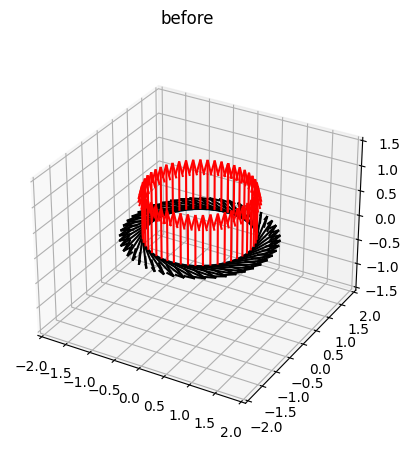

In [59]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2,2))
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_aspect('equal', adjustable='box')
plt.suptitle("before")
plt.plot(points[0],points[1],points[2])
plt.quiver(points[0],points[1],points[2],speeds[0],speeds[1],speeds[2],color="black")
h=np.cross(points,speeds,axis=0)
plt.quiver(points[0],points[1],points[2],h[0],h[1],h[2],color="r")
plt.show()

In [60]:
a=np.random.random()*2*np.pi
b=np.random.random()*2*np.pi
points=np.matmul(rotz(a),(np.matmul(roty(b),points)))
speeds=np.matmul(rotz(a),(np.matmul(roty(b),speeds)))

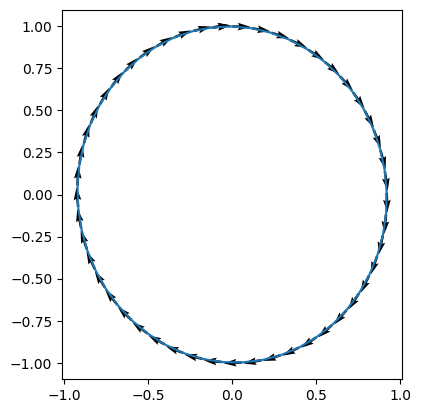

In [61]:
ax = plt.figure().add_subplot()
# ax.set_aspect('equal', adjustable='box')
plt.plot(points[0],points[1])
plt.quiver(points[0],points[1],speeds[0],speeds[1])
ax.set_aspect('equal', adjustable='box')
plt.show()

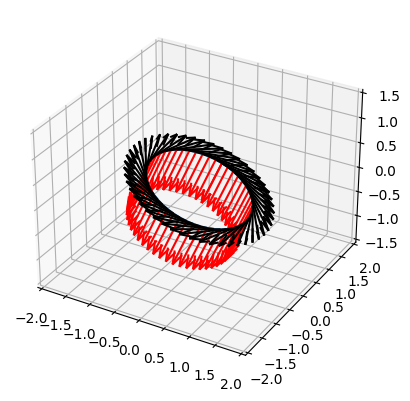

In [62]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2,2))
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_aspect('equal', adjustable='box')
plt.plot(points[0],points[1],points[2])
plt.quiver(points[0],points[1],points[2],speeds[0],speeds[1],speeds[2],color="black")
h=np.cross(points,speeds,axis=0)
plt.quiver(points[0],points[1],points[2],h[0],h[1],h[2],color="r")
plt.show()

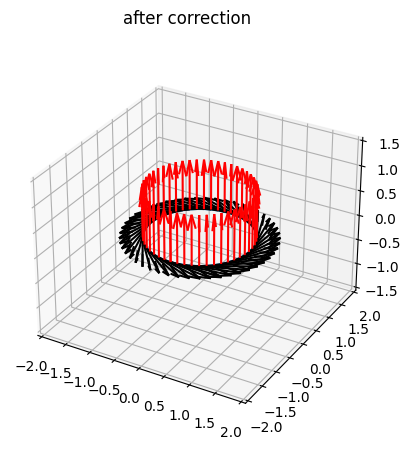

In [64]:
rot=rot_to_top(h[:,45])
points=(np.matmul(rot,points))
speeds=(np.matmul(rot,speeds))
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2,2))
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_aspect('equal', adjustable='box')
plt.suptitle("after correction")
plt.plot(points[0],points[1],points[2])
plt.quiver(points[0],points[1],points[2],speeds[0],speeds[1],speeds[2],color="black")
h=np.cross(points,speeds,axis=0)
plt.quiver(points[0],points[1],points[2],h[0],h[1],h[2],color="r")
plt.show()

In [65]:
points[0]

array([ 8.31902581e-17,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -1.49642772e-16])

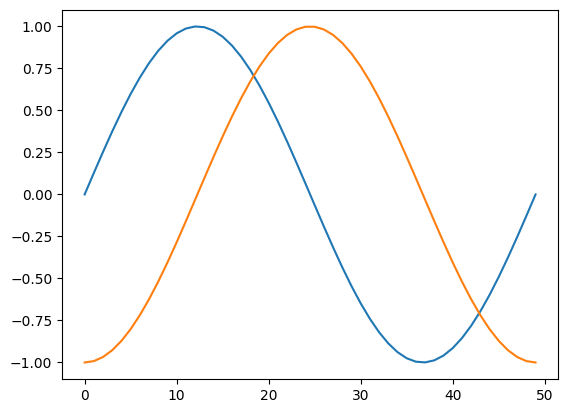

In [66]:
plt.plot(points[0])
plt.plot(points[1])

In [22]:
for i in range(10**4):
    vec=np.concatenate((np.random.random(2),np.random.random(1)))
    vec2=np.random.random(3)
    # vec2=np.concatenate((np.random.random(2),np.array([0])))
    vec=vec/np.linalg.norm(vec)
    vec2=vec2/np.linalg.norm(vec2)
    vec3=np.cross(vec2,vec)
    vec=np.matmul(rot_to_top(vec3),vec)
    vec2=np.matmul(rot_to_top(vec3),vec2)
    vec3=np.matmul(rot_to_top(vec3),vec3)
    x=vec
    x=np.cross(vec2,vec)/np.linalg.norm(np.cross(vec,vec2))
    if abs(x[2]-1)>10**-10: print(x,vec3)
##checking if code turns all vectors up, uncomment vec2,vec3 statement+ 2nd x= statment to check if it turns cross products to top

rot_to_top matrix clearly contains a mirroring in one of the coordinates, not sure where that comes from though.

fixed now, though not sure how the first matrix got a mirroring

## application on saturn system
done by translating frame s.t. saturn in the middle and then rotating the angular momentum of pan upwards to the z+ direction, as pan has 0 incline according to https://ssd.jpl.nasa.gov/sats/elem/

In [23]:
import numpy as np

In [24]:
system_saturn={"Saturn":{"m":5.6834*10**26,"x":np.array([  89861.7011163 , -260727.43188167,  123433.71199521]),"v":np.array([ 1.27274633,  0.27601689, -0.27092789])},
'Mimas': {'m': 3.7493e+19,
  'x': np.array([-1.53915986e+08,  9.87909749e+07, -4.25283160e+07]),
  'v': np.array([-8213.72405082, -9786.81819635,  6024.71802554])},
 'Enceladus': {'m': 1.08022e+20,
  'x': np.array([ 2.34973807e+08,  2.33650386e+07, -3.49835459e+07]),
  'v': np.array([-2003.46577623, 11098.05673036, -5619.83963382])},
 'Tethys': {'m': 6.17449e+20,
  'x': np.array([-1.07874797e+08, -2.40322483e+08,  1.32644393e+08]),
  'v': np.array([10506.62745303, -4185.00650995,   976.00850291])},
 'Dione': {'m': 1.095452e+21,
  'x': np.array([ 1.19104122e+08,  3.11591678e+08, -1.74637379e+08]),
  'v': np.array([-9486.13424293,  3212.46321187,  -761.59768108])},
 'Rhea': {'m': 2.306518e+21,
  'x': np.array([ 3.62527319e+08,  3.23174433e+08, -2.04002024e+08]),
  'v': np.array([-6115.4349641 ,  5416.78672387, -2297.27064105])},
 'Titan': {'m': 1.3452e+23,
  'x': np.array([-4.10374248e+08,  1.05548576e+09, -5.03486605e+08]),
  'v': np.array([-5201.86391656, -1296.44611543,  1186.65870186])},
 'Hyperion': {'m': 5.62e+18,
  'x': np.array([-2.90547781e+08,  1.45953690e+09, -7.05044907e+08]),
  'v': np.array([-4427.2850247 ,  -618.2734007 ,   725.88095033])},
 'Iapetus': {'m': 1.805635e+21,
  'x': np.array([ 1.72908290e+09,  2.86007194e+09, -1.00828662e+09]),
  'v': np.array([-2784.73166963,  1818.40790043,   140.90270205])},
 'Phoebe': {'m': 8.292e+18,
  'x': np.array([ 1.11413993e+10,  9.27192117e+09, -1.40177659e+09]),
  'v': np.array([  794.37369518, -1278.39419858,   -99.17939465])},
 'Janus': {'m': 1.898e+18,
  'x': np.array([-1.47467199e+08,  3.23540200e+07, -2.21076656e+06]),
  'v': np.array([ -3039.02728236, -13698.81040288,   7453.28282841])},
 'Epimetheus': {'m': 5.264e+17,
  'x': np.array([ 1.31241486e+07, -1.34168132e+08,  6.90271744e+07]),
  'v': np.array([15750.95917288,   675.13703448, -1991.15673445])},
 'Helene': {'m': 1.2e+17,
  'x': np.array([-2.86094882e+08,  2.29003950e+08, -9.38039030e+07]),
  'v': np.array([-6548.08735398, -6422.39434725,  3985.01716951])},
 'Telesto': {'m': 4.1e+16,
  'x': np.array([ 1.77687220e+08, -2.17242818e+08,  9.09864593e+07]),
  'v': np.array([ 9005.16791214,  5797.20059558, -3757.23464422])},
 'Calypso': {'m': 4e+16,
  'x': np.array([-2.87722906e+08, -3.34172132e+07,  5.38878285e+07]),
  'v': np.array([ 2074.1077259 , -9997.06490634,  4960.29505002])},
 'Atlas': {'m': 7e+16,
  'x': np.array([-6.96100555e+07, -1.02612372e+08,  6.05093369e+07]),
  'v': np.array([14263.46118124, -8058.24931227,  2841.39558857])},
 'Prometheus': {'m': 1.6e+17,
  'x': np.array([-1.38457302e+08, -6.39947919e+06,  1.67542093e+07]),
  'v': np.array([  1559.54591466, -14611.82893543,   7502.86454711])},
 'Pandora': {'m': 1.4e+17,
  'x': np.array([ 2.91426332e+07,  1.21720366e+08, -6.67458225e+07]),
  'v': np.array([-15953.4766317 ,   3565.16003664,   -319.69838264])},
 'Pan': {'m': 4950000000000000.0,
  'x': np.array([-2.13065950e+07, -1.16194051e+08,  6.29439053e+07]),
  'v': np.array([ 1.66138946e+04, -3.06686871e+03, -2.59861962e+00])}
}

In [25]:
x=np.zeros((3,len(system_saturn)))
v=np.zeros((3,len(system_saturn)))
m=np.zeros(len(system_saturn))
for i,(key,item) in enumerate(system_saturn.items()):
    h=np.cross(item["x"]-system_saturn["Saturn"]["x"],item["v"]*item["m"])
    x[:,i]=item["x"].transpose()-system_saturn["Saturn"]["x"].transpose()
    v[:,i]=item["v"].transpose()-system_saturn["Saturn"]["v"].transpose()
    m[i]=item["m"]
    print(key,":",h,np.degrees(np.arccos(h[2]/np.linalg.norm(h))),i,item["m"])

Saturn : [-0.  0.  0.] nan 0 5.6834e+26
Mimas : [6.72375678e+30 4.79224844e+31 8.70141512e+31] 29.080097453881127 1 3.7493e+19
Enceladus : [2.77450440e+31 1.50187927e+32 2.86699976e+32] 28.044866024245007 2 1.08022e+20
Tethys : [1.97768151e+32 9.24767429e+32 1.83633792e+33] 27.247580947225714 3 6.17449e+20
Dione : [3.54824147e+32 1.91533814e+33 3.65946993e+33] 28.026267296480565 4 1.095452e+21
Rhea : [8.36541720e+32 4.79970917e+33 9.09043282e+33] 28.189312014326614 5 2.306518e+21
Titan : [8.06995539e+34 4.17925619e+35 8.10347694e+35] 27.71128519999903 6 1.3452e+23
Hyperion : [3.50492683e+30 1.87311765e+31 3.73316014e+31] 27.042472046508017 7 5.62e+18
Iapetus : [4.03871691e+33 4.63060805e+33 2.00592932e+34] 17.030473437095473 8 1.805635e+21
Phoebe : [-2.24861647e+31 -7.16775108e+28 -1.79178202e+32] 172.8469625382986 9 8.292e+18
Janus : [4.00689001e+29 2.10085483e+30 4.02465833e+30] 27.98641103867859 10 1.898e+18
Epimetheus : [1.15866516e+29 5.84963745e+29 1.11489940e+30] 28.141078509638

C:\Users\kdvan\AppData\Local\Temp\ipykernel_3388\2174694243.py:9: RuntimeWarning: invalid value encountered in double_scalars
  print(key,":",h,np.degrees(np.arccos(h[2]/np.linalg.norm(h))),i,item["m"])


In [26]:
h

array([9.55168856e+26, 5.16600361e+27, 9.85903450e+27])

In [27]:
h

array([9.55168856e+26, 5.16600361e+27, 9.85903450e+27])

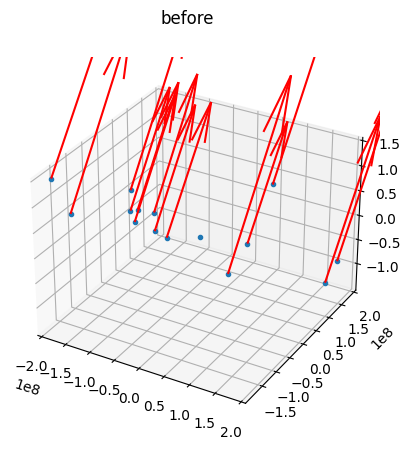

In [28]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2*10**8,2*10**8))
ax.set_aspect('equal', adjustable='box')
plt.suptitle("before")
plt.plot(x[0],x[1],x[2],".")
plt.quiver(x[0],x[1],x[2],v[0],v[1],v[2],color="black")
h=np.cross(x,v,axis=0)/10**4 # division by 10**4 so that arrows star on screen and dont suddenly go the opposite direction for some reason (probs floating point)
plt.quiver(x[0],x[1],x[2],h[0],h[1],h[2],color="r")
plt.show()

In [29]:
rot=rot_to_top(h[:,18])
np.linalg.det(rot)

1.0000000000000002

In [30]:
v[:,18]

array([ 1.66126219e+04, -3.06714473e+03, -2.32769173e+00])

In [31]:
np.matmul(rot,v[:,18])

array([ 4.94970772e+00, -1.68933881e+04,  5.89750836e-14])

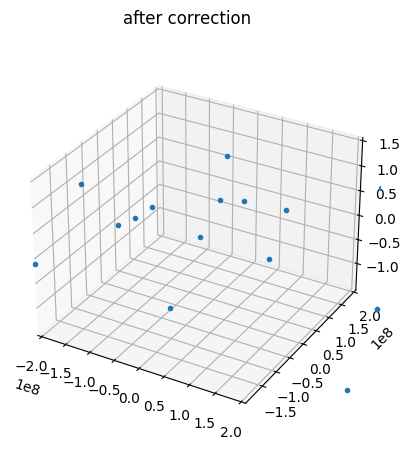

In [32]:
rot=rot_to_top(h[:,18])
x2=(np.matmul(rot,x))
v2=(np.matmul(rot,v))
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2*10**8,2*10**8))
ax.set_aspect('equal', adjustable='box')
plt.suptitle("after correction")
plt.plot(x2[0],x2[1],x2[2],".")
plt.quiver(x2[0],x2[1],x2[2],v2[0],v2[1],v2[2],color="black")
h2=np.cross(x2,v2,axis=0)/10**8
plt.quiver(x2[0],x2[1],x2[2],h2[0],h2[1],h2[2],color="r")
plt.show()

In [33]:
inclines=np.degrees(np.arccos(h2[2]/np.sqrt(h2[0]**2+h2[1]**2+h2[2]**2)))

C:\Users\kdvan\AppData\Local\Temp\ipykernel_3388\1600466663.py:1: RuntimeWarning: invalid value encountered in divide
  inclines=np.degrees(np.arccos(h2[2]/np.sqrt(h2[0]**2+h2[1]**2+h2[2]**2)))


In [34]:
for i,key in enumerate(system_saturn.keys()):
    print(key,inclines[i])

Saturn nan
Mimas 1.5726074244662247
Enceladus 0.00802727690142734
Tethys 1.0931788322238056
Dione 0.027133056059811204
Rhea 0.3096231454948356
Titan 0.40113432728409476
Hyperion 1.0108185392506466
Iapetus 15.770942528201559
Phoebe 152.43820562500463
Janus 0.16509015561498652
Epimetheus 0.35452370519186766
Helene 0.21583161423125977
Telesto 1.1814396494203665
Calypso 1.4999692071316344
Atlas 0.002749947527717364
Prometheus 0.008121462074830539
Pandora 0.049853302889900704
Pan 0.0


kan extra checken met https://iopscience.iop.org/article/10.1088/0004-6256/135/1/261/pdf

In [35]:
x[:,0]

array([0., 0., 0.])

In [36]:
system_saturn_rotated={key: {"m":m[i],"x":x2[:,i],"v":v2[:,i]} for i,key in enumerate(system_saturn.keys())} # note that saturn is still centered
system_saturn_rotated

{'Saturn': {'m': 5.6834e+26,
  'x': array([0., 0., 0.]),
  'v': array([0., 0., 0.])},
 'Mimas': {'m': 3.7493e+19,
  'x': array([ 8.13053642e+07,  1.69447949e+08, -5.00428249e+06]),
  'v': array([-12644.87645026,   6298.65577948,     88.95130212])},
 'Enceladus': {'m': 1.08022e+20,
  'x': array([ 7.47006412e+07, -2.26673682e+08,  2.53596187e+04]),
  'v': array([1.19518517e+04, 3.98904824e+03, 1.14547689e+00])},
 'Tethys': {'m': 6.17449e+20,
  'x': array([-2.87972896e+08,  6.25188375e+07, -3.29014339e+06]),
  'v': array([ -2405.53218498, -11091.20237833,   -175.5949315 ])},
 'Dione': {'m': 1.095452e+21,
  'x': array([ 3.71910889e+08, -6.03317921e+07,  1.55430504e+05]),
  'v': array([1.62331467e+03, 9.91329917e+03, 2.34218651e+00])},
 'Rhea': {'m': 2.306518e+21,
  'x': array([ 4.34830152e+08, -2.97591981e+08,  4.09592431e+05]),
  'v': array([4799.28050015, 6999.55401764,  -45.38029269])},
 'Titan': {'m': 1.3452e+23,
  'x': array([1.08716325e+09, 5.95571541e+08, 8.66675570e+06]),
  'v': ar

In [37]:
s=system_saturn_rotated
s["Pan"]["x"],s["Pan"]["v"]

(array([-1.33584258e+08, -3.83590435e+04, -1.22460851e-09]),
 array([ 4.94970772e+00, -1.68933881e+04,  6.29718864e-14]))

## now to centre of mass frame

In [38]:
m=0
x=0
v=0
for key,dat in system_saturn_rotated.items():
    m+=dat["m"]
    x+=dat["m"]*dat["x"]
    v+=dat["m"]*dat["v"]
x/m,v/m
system_saturn_centered_after_rotation={key: {"m":dat["m"],"x":dat["x"]-x/m,"v":dat["v"]-v/m} for key,dat in system_saturn_rotated.items()}

In [39]:
system_saturn_centered_after_rotation

{'Saturn': {'m': 5.6834e+26,
  'x': array([-269883.94832819, -135765.32750271,   -3951.65082116]),
  'v': array([ 0.57120069, -1.20130971, -0.0026402 ])},
 'Mimas': {'m': 3.7493e+19,
  'x': array([ 8.10354803e+07,  1.69312184e+08, -5.00823414e+06]),
  'v': array([-12644.30524958,   6297.45446977,     88.94866192])},
 'Enceladus': {'m': 1.08022e+20,
  'x': array([ 7.44307572e+07, -2.26809447e+08,  2.14079679e+04]),
  'v': array([1.19524229e+04, 3.98784693e+03, 1.14283669e+00])},
 'Tethys': {'m': 6.17449e+20,
  'x': array([-2.88242780e+08,  6.23830722e+07, -3.29409504e+06]),
  'v': array([ -2404.9609843 , -11092.40368804,   -175.59757171])},
 'Dione': {'m': 1.095452e+21,
  'x': array([ 3.71641005e+08, -6.04675574e+07,  1.51478853e+05]),
  'v': array([1.62388587e+03, 9.91209786e+03, 2.33954630e+00])},
 'Rhea': {'m': 2.306518e+21,
  'x': array([ 4.34560268e+08, -2.97727746e+08,  4.05640780e+05]),
  'v': array([4799.85170084, 6998.35270792,  -45.38293289])},
 'Titan': {'m': 1.3452e+23,
  'x

In [40]:
syst_final=system_saturn_centered_after_rotation

In [41]:
string=''
for key,item in syst_final.items():
    string+=f'{{"{key}", {item["m"]}, {{{str(list(item["x"]))[1:-1]}}}, {{{str(list(item["v"]))[1:-1]}}}}},\n'
print(string)

{"Saturn", 5.6834e+26 {-269883.9483281949, -135765.3275027061, -3951.650821157909}, {0.5712006864751628, -1.2013097136088542, -0.0026402047406981436}},
{"Mimas", 3.7493e+19 {81035480.29437092, 169312183.95669305, -5008234.138896362}, {-12644.305249577526, 6297.454469766939, 88.94866191808869}},
{"Enceladus", 1.08022e+20 {74430757.24220988, -226809447.4342958, 21407.96787442675}, {11952.42288159303, 3987.8469269293664, 1.1428366892009416}},
{"Tethys", 6.17449e+20 {-288242779.5160179, 62383072.15644543, -3294095.0405105953}, {-2404.9609842965374, -11092.40368804483, -175.5975717090492}},
{"Dione", 1.095452e+21 {371641004.9716364, -60467557.37795043, 151478.8530827912}, {1623.8858668065575, 9912.097858045712, 2.339546302347022}},
{"Rhea", 2.306518e+21 {434560268.13074356, -297727746.0997345, 405640.78039853484}, {4799.851700840729, 6998.352707921699, -45.38293289295507}},
{"Titan", 1.3452e+23 {1086893364.6233644, 595435775.6897647, 8662804.048128707}, {-2517.7845967998865, 4879.4540345295

In [53]:
dict={'Saturn': {'m': 5.6834e+26,
  'x': np.array([-269883.94832819, -135765.32750271,   -3951.65082116]),
  'v': np.array([ 0.57120069, -1.20130971, -0.0026402 ])},
 'Mimas': {'m': 3.7493e+19,
  'x': np.array([ 8.10354803e+07,  1.69312184e+08, -5.00823414e+06]),
  'v': np.array([-12644.30524958,   6297.45446977,     88.94866192])},
 'Enceladus': {'m': 1.08022e+20,
  'x': np.array([ 7.44307572e+07, -2.26809447e+08,  2.14079679e+04]),
  'v': np.array([1.19524229e+04, 3.98784693e+03, 1.14283669e+00])},
 'Tethys': {'m': 6.17449e+20,
  'x': np.array([-2.88242780e+08,  6.23830722e+07, -3.29409504e+06]),
  'v': np.array([ -2404.9609843 , -11092.40368804,   -175.59757171])},
 'Dione': {'m': 1.095452e+21,
  'x': np.array([ 3.71641005e+08, -6.04675574e+07,  1.51478853e+05]),
  'v': np.array([1.62388587e+03, 9.91209786e+03, 2.33954630e+00])},
 'Rhea': {'m': 2.306518e+21,
  'x': np.array([ 4.34560268e+08, -2.97727746e+08,  4.05640780e+05]),
  'v': np.array([4799.85170084, 6998.35270792,  -45.38293289])},
 'Titan': {'m': 1.3452e+23,
  'x': np.array([1.08689336e+09, 5.95435776e+08, 8.66280405e+06]),
  'v': np.array([-2.51778460e+03,  4.87945403e+03,  2.97311428e+00])},
 'Hyperion': {'m': 5.62e+18,
  'x': np.array([1.55154799e+09, 5.51068257e+08, 2.78737844e+07]),
  'v': np.array([-1588.28268566,  4241.08569406,   -23.83893716])},
 'Iapetus': {'m': 1.805635e+21,
  'x': np.array([ 3.23361611e+09, -1.18026574e+09,  5.80586591e+08]),
  'v': np.array([1064.95625375, 3068.92932753,  727.14003808])},
 'Phoebe': {'m': 8.292e+18,
  'x': np.array([ 1.04932046e+10, -9.26994945e+09,  4.00312027e+09]),
  'v': np.array([ -935.30724495, -1013.56278418,  -610.77698464])},
 'Janus': {'m': 1.898e+18,
  'x': np.array([5.45519255e+06, 1.50891766e+08, 4.01842681e+05]),
  'v': np.array([-15880.69501716,    497.75223985,    -16.89264416])},
 'Epimetheus': {'m': 5.264e+17,
  'x': np.array([-1.46788516e+08, -3.72989384e+07, -3.22642274e+03]),
  'v': np.array([  4049.58209348, -15365.69061409,    -98.31554997])},
 'Helene': {'m': 1.2e+17,
  'x': np.array([ 1.96940796e+08,  3.22962498e+08, -1.34710233e+06]),
  'v': np.array([-8498.14385028,  5271.27528679,   -12.90888418])},
 'Telesto': {'m': 4.1e+16,
  'x': np.array([-2.02803828e+08, -2.14223323e+08, -4.96961347e+06]),
  'v': np.array([ 8242.72209748, -7801.07228521,   134.90641752])},
 'Calypso': {'m': 4e+16,
  'x': np.array([-1.00508077e+08,  2.76851769e+08,  7.50353002e+06]),
  'v': np.array([-10675.46831894,  -3857.1366187 ,    -68.03408389])},
 'Atlas': {'m': 7e+16,
  'x': np.array([-1.28673365e+08,  4.97935949e+07, -1.92549871e+03]),
  'v': np.array([-6.04064953e+03, -1.54908291e+04,  7.57199115e-01])},
 'Prometheus': {'m': 1.6e+17,
  'x': np.array([-3.56486079e+07,  1.34986140e+08, -1.15713957e+04]),
  'v': np.array([-1.59584813e+04, -4.19017576e+03, -2.16070869e+00])},
 'Pandora': {'m': 1.4e+17,
  'x': np.array([ 1.41695221e+08, -6.52654991e+06, -1.25802304e+05]),
  'v': np.array([6.84436666e+02, 1.63357746e+04, 2.45955651e+00])},
 'Pan': {'m': 4950000000000000.0,
  'x': np.array([-1.33854142e+08, -1.74124371e+05, -3.95165082e+03]),
  'v': np.array([ 5.52090841e+00, -1.68945894e+04, -2.64020474e-03])}}

In [57]:
x=dict["Atlas"]["x"]-dict["Saturn"]["x"]
v=dict["Atlas"]["v"]-dict["Saturn"]["v"]

In [43]:
G=6.674*10**-11
M=5.6834e+26

In [87]:
h=np.cross(x,v)
habs=np.linalg.norm(h)
n=np.cross(np.array([0,0,1]),h)
nabs=np.linalg.norm(n)
e_vec=np.cross(v,h)/G/M-x/np.linalg.norm(x)
e=np.linalg.norm(a)
a=habs**2/G/M
i=np.arccos(h[2]/habs)
Omega=np.arccos(n[0]/nabs) if n[1]>=0 else 2*np.pi-np.arccos(n[0]/nabs)
omega=np.arccos(np.dot(n,e_vec)/nabs/e) if e_vec[2]>=0 else 2*np.pi-np.arccos(np.dot(n,e_vec)/nabs/e)
T=np.pi*2*np.sqrt(a**3/G/M)

In [88]:
T/24/60/60

0.6074356188958419

In [75]:
Omega

2.4593071724300932

In [62]:
print(a)

138323182.06568134


In [59]:
np.linalg.norm(e)

0.004130694397161734

In [39]:
n

array([ 0.00000000e+00, -2.26141174e+12, -3.75219043e+05])

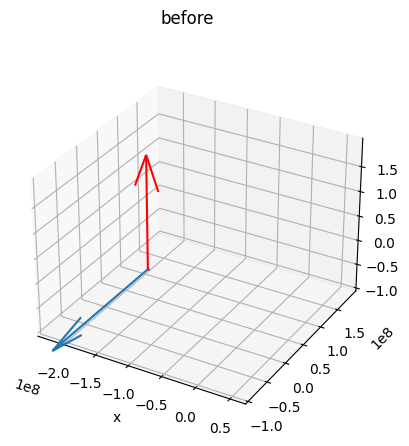

In [38]:
ax = plt.figure().add_subplot(projection='3d')
ax.set_aspect('equal', adjustable='box')

plt.suptitle("before")
ax.scatter(x[0],x[1],x[2],s=1)
ax.quiver(x[0],x[1],x[2],v[0],v[1],v[2],color="black")
h=np.cross(x,v,axis=0)
ax.quiver(x[0],x[1],x[2],h[0]/10000,h[1]/10000,h[2]/10000,color="r")
ax.quiver(x[0],x[1],x[2],n[0]/10000,n[1]/10000,n[2]/10000)
ax.set_xlim(x[0]-1e8,x[0]+2e8)
ax.set_ylim(x[1]-1e8,x[1]+2e8)
ax.set_zlim(x[2]-1e8,x[2]+2e8)
ax.set_xlabel("x")
plt.show()

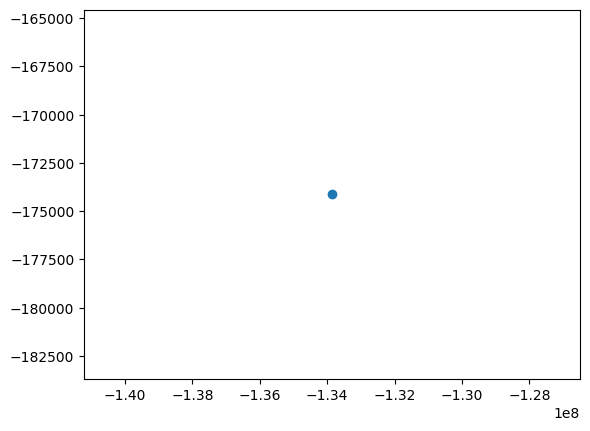

In [25]:
plt.scatter(x[0],x[1])

# Daphnis

In [9]:
syst_with_Daphnis={'Saturn': {'m': 5.6834e+26,
  'x': np.array([-269289.17797679,  113172.31502967,  -28958.22586522]),
  'v': np.array([-0.50665837, -1.14360623,  0.63822254])},
 'Mimas': {'m': 3.7493e+19,
  'x': np.array([ 5.13197898e+07,  1.56544307e+08, -8.67133604e+07]),
  'v': np.array([-13607.7031699 ,   4106.21402805,  -1275.8958257 ])},
 'Enceladus': {'m': 1.08022e+20,
  'x': np.array([ 1.88914312e+08, -1.33039430e+08,  5.14516688e+07]),
  'v': np.array([ 7544.30311294,  8716.5300654 , -5297.66965427])},
 'Tethys': {'m': 6.17449e+20,
  'x': np.array([ 8.23922007e+07,  2.44622295e+08, -1.42286268e+08]),
  'v': np.array([-10850.57337858,   3251.93555635,   -716.07948417])},
 'Dione': {'m': 1.095452e+21,
  'x': np.array([ 3.45661072e+08, -1.46346443e+08,  4.33772409e+07]),
  'v': np.array([ 3958.38408588,  7978.26790609, -4563.25086898])},
 'Rhea': {'m': 2.306518e+21,
  'x': np.array([ 4.08686506e+08,  2.78199869e+08, -1.81760485e+08]),
  'v': np.array([-5302.65490051,  6066.27838925, -2666.16929786])},
 'Titan': {'m': 1.3452e+23,
  'x': np.array([ 1.08703566e+09, -4.58730165e+08,  1.28492745e+08]),
  'v': np.array([ 2226.8933015 ,  4601.43875834, -2592.72565702])},
 'Hyperion': {'m': 5.62e+18,
  'x': np.array([ 1.00111937e+09,  7.10253721e+08, -4.52090454e+08]),
  'v': np.array([-3497.9769557 ,  4150.41819897, -1740.19317503])},
 'Iapetus': {'m': 1.805635e+21,
  'x': np.array([ 3.00862409e+09, -1.74371141e+09, -2.04393884e+08]),
  'v': np.array([1501.85431386, 2821.01484202, -956.20381251])},
 'Phoebe': {'m': 8.292e+18,
  'x': np.array([-2.02062582e+09, -1.07799299e+10,  2.05959802e+08]),
  'v': np.array([-1946.91799577,   376.04033254,   236.71005496])},
 'Janus': {'m': 1.898e+18,
  'x': np.array([ 3.29558445e+07,  1.28953563e+08, -7.08432398e+07]),
  'v': np.array([-15467.38412329,   3783.79093119,   -535.66322442])},
 'Epimetheus': {'m': 5.264e+17,
  'x': np.array([-3.54049208e+06,  1.33641274e+08, -6.94076744e+07]),
  'v': np.array([-15900.3120202 ,    176.58625101,   1339.62461394])},
 'Helene': {'m': 1.2e+17,
  'x': np.array([ 2.48512576e+08,  2.42032099e+08, -1.52134979e+08]),
  'v': np.array([-7520.6170727 ,  6100.34802347, -2442.40389338])},
 'Telesto': {'m': 4.1e+16,
  'x': np.array([-2.02896961e+08,  1.96529657e+08, -8.50192554e+07]),
  'v': np.array([-8169.3202569 , -6500.73145123,  4454.1002414 ])},
 'Calypso': {'m': 4e+16,
  'x': np.array([ 2.83814195e+08,  5.80184067e+07, -5.24719469e+07]),
  'v': np.array([-2916.46837019,  9725.92911088, -5077.56332654])},
 'Atlas': {'m': 7e+16,
  'x': np.array([ 1.33298991e+08, -3.24236366e+07,  4.07873932e+06]),
  'v': np.array([ 3718.30673335, 14227.80468593, -7814.33436016])},
 'Prometheus': {'m': 1.6e+17,
  'x': np.array([ 87256201.81659403,  92443178.27184716, -56908103.13150598]),
  'v': np.array([-12814.32452808,   9717.62297225,  -3851.28416762])},
 'Pandora': {'m': 1.4e+17,
  'x': np.array([ 8.01284573e+07, -1.06342316e+08,  4.79831200e+07]),
  'v': np.array([13388.53842558,  7784.0613837 , -5359.65322238])},
 'Pan': {'m': 4950000000000000.0,
  'x': np.array([ 71044067.59764217,  97178666.8633506 , -57798933.43229438]),
  'v': np.array([-14212.06935196,   8582.53033765,  -3120.21438897])},
 'Daphnis': {'m': 65000000000000.0,
  'x': np.array([-1.17443122e+08,  6.61685315e+07, -2.32923548e+07]),
  'v': np.array([ -8453.30200319, -12415.77868356,   7324.47310319])}}

In [10]:
system_saturn=syst_with_Daphnis

In [11]:
x=np.zeros((3,len(system_saturn)))
v=np.zeros((3,len(system_saturn)))
m=np.zeros(len(system_saturn))
for i,(key,item) in enumerate(system_saturn.items()):
    h=np.cross(item["x"]-system_saturn["Saturn"]["x"],item["v"]*item["m"])
    x[:,i]=item["x"].transpose()-system_saturn["Saturn"]["x"].transpose()
    v[:,i]=item["v"].transpose()-system_saturn["Saturn"]["v"].transpose()
    m[i]=item["m"]
    print(key,":",h,np.degrees(np.arccos(h[2]/np.linalg.norm(h))),i,item["m"])

Saturn : [ 0. -0.  0.] nan 0 5.6834e+26
Mimas : [5.86221338e+30 4.66937036e+31 8.77525257e+31] 28.203936416253157 1 3.7493e+19
Enceladus : [2.77255819e+31 1.50217303e+32 2.86643738e+32] 28.05347747332176 2 1.08022e+20
Tethys : [1.77531182e+32 9.89626002e+32 1.80410819e+33] 29.130785030249537 3 6.17449e+20
Dione : [3.52763677e+32 1.91746322e+33 3.65844655e+33] 28.053845488691042 4 1.095452e+21
Rhea : [8.32671037e+32 4.73759940e+33 9.12328776e+33] 27.800261441608075 5 2.306518e+21
Titan : [8.04793001e+34 4.17723282e+35 8.10477927e+35] 27.69417313771879 6 1.3452e+23
Hyperion : [3.59939938e+30 1.86803765e+31 3.73181319e+31] 27.011518122297336 7 5.62e+18
Iapetus : [4.05178753e+33 4.64082317e+33 2.00553746e+34] 17.07614518471076 8 1.805635e+21
Phoebe : [-2.18013651e+31  6.40104930e+29 -1.80331061e+32] 173.1036625477062 9 8.292e+18
Janus : [3.77571754e+29 2.11268122e+30 4.02099039e+30] 28.09053374651565 10 1.898e+18
Epimetheus : [1.00610231e+29 5.83001380e+29 1.11731602e+30] 27.90122588759868

C:\Users\kdvan\AppData\Local\Temp\ipykernel_6936\2174694243.py:9: RuntimeWarning: invalid value encountered in double_scalars
  print(key,":",h,np.degrees(np.arccos(h[2]/np.linalg.norm(h))),i,item["m"])


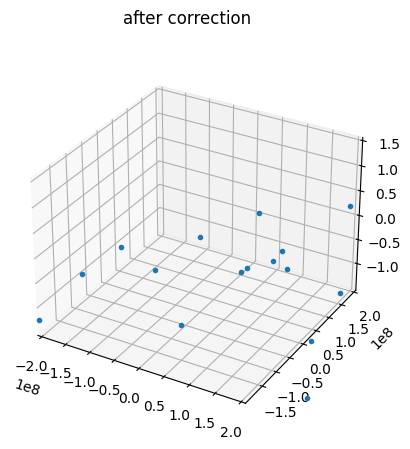

In [13]:
h=np.cross(x,v,axis=0)/10**4 # division by 10**4 so that arrows star on screen and dont suddenly go the opposite direction for some reason (probs floating point)
rot=rot_to_top(h[:,18])
x2=(np.matmul(rot,x))
v2=(np.matmul(rot,v))
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim((-2*10**8,2*10**8))
ax.set_aspect('equal', adjustable='box')
plt.suptitle("after correction")
plt.plot(x2[0],x2[1],x2[2],".")
plt.quiver(x2[0],x2[1],x2[2],v2[0],v2[1],v2[2],color="black")
h2=np.cross(x2,v2,axis=0)/10**8
plt.quiver(x2[0],x2[1],x2[2],h2[0],h2[1],h2[2],color="r")
plt.show()

In [14]:
system_saturn_rotated={key: {"m":m[i],"x":x2[:,i],"v":v2[:,i]} for i,key in enumerate(system_saturn.keys())} # note that saturn is still centered
m=0
x=0
v=0
for key,dat in system_saturn_rotated.items():
    m+=dat["m"]
    x+=dat["m"]*dat["x"]
    v+=dat["m"]*dat["v"]
x/m,v/m
system_saturn_centered_after_rotation={key: {"m":dat["m"],"x":dat["x"]-x/m,"v":dat["v"]-v/m} for key,dat in system_saturn_rotated.items()}

In [16]:
system_saturn_centered_after_rotation

{'Saturn': {'m': 5.6834e+26,
  'x': array([ 68618.46945132, 285370.02546127,   3752.78684993]),
  'v': array([-1.37384546,  0.29021186, -0.00891048])},
 'Mimas': {'m': 3.7493e+19,
  'x': array([ 1.84864505e+08, -2.20022300e+07,  2.52038379e+05]),
  'v': array([ 1979.99845269, 14127.47246547,  -390.65991178])},
 'Enceladus': {'m': 1.08022e+20,
  'x': array([-1.09337051e+08, -2.09954264e+08,  3.85213130e+04]),
  'v': array([ 1.12661873e+04, -5.83375816e+03,  5.13663068e-01])},
 'Tethys': {'m': 6.17449e+20,
  'x': array([ 2.92419775e+08, -3.65427910e+07, -5.40576650e+06]),
  'v': array([ 1417.77945563, 11260.97557673,   -55.91207267])},
 'Dione': {'m': 1.095452e+21,
  'x': array([-9.19368715e+07, -3.66507892e+08,  1.61252428e+05]),
  'v': array([ 9.70475483e+03, -2.44183455e+03,  6.58321675e-01])},
 'Rhea': {'m': 2.306518e+21,
  'x': array([ 3.92478412e+08, -3.51293703e+08,  3.18337144e+06]),
  'v': array([ 5.66737142e+03,  6.31721778e+03, -1.11962047e+00])},
 'Titan': {'m': 1.3452e+23,
 

In [19]:
syst_final=system_saturn_centered_after_rotation
string=''
for key,item in syst_final.items():
    string+=f'{{"{key}", {item["m"]}, {{{str(list(item["x"]))[1:-1]}}}, {{{str(list(item["v"]))[1:-1]}}}}},\n'
print(string)

{"Saturn", 5.6834e+26, {68618.46945132129, 285370.0254612695, 3752.786849926826}, {-1.3738454583521067, 0.29021185514628206, -0.008910477307691143}},
{"Mimas", 3.7493e+19, {184864505.2984949, -22002229.98536286, 252038.37892037246}, {1979.9984526941744, 14127.472465471245, -390.6599117770643}},
{"Enceladus", 1.08022e+20, {-109337051.45078894, -209954263.71984732, 38521.31296500265}, {11266.187308645485, -5833.758164118414, 0.5136630682711915}},
{"Tethys", 6.17449e+20, {292419775.1733313, -36542790.995482154, -5405766.499901629}, {1417.7794556282245, 11260.975576725457, -55.912072669387435}},
{"Dione", 1.095452e+21, {-91936871.52056037, -366507891.67800426, 161252.42848012008}, {9704.754830251704, -2441.834545995832, 0.6583216746030806}},
{"Rhea", 2.306518e+21, {392478412.35828775, -351293703.28780323, 3183371.4393234383}, {5667.371423473723, 6317.21777563236, -1.1196204718953089}},
{"Titan", 1.3452e+23, {-284096597.30585146, -1152321963.9482226, -5788718.088939952}, {5569.790097038688,